Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /Users/chris/Desktop/MC/data/plots/simonebib_timingcut_linearscale.png has been created


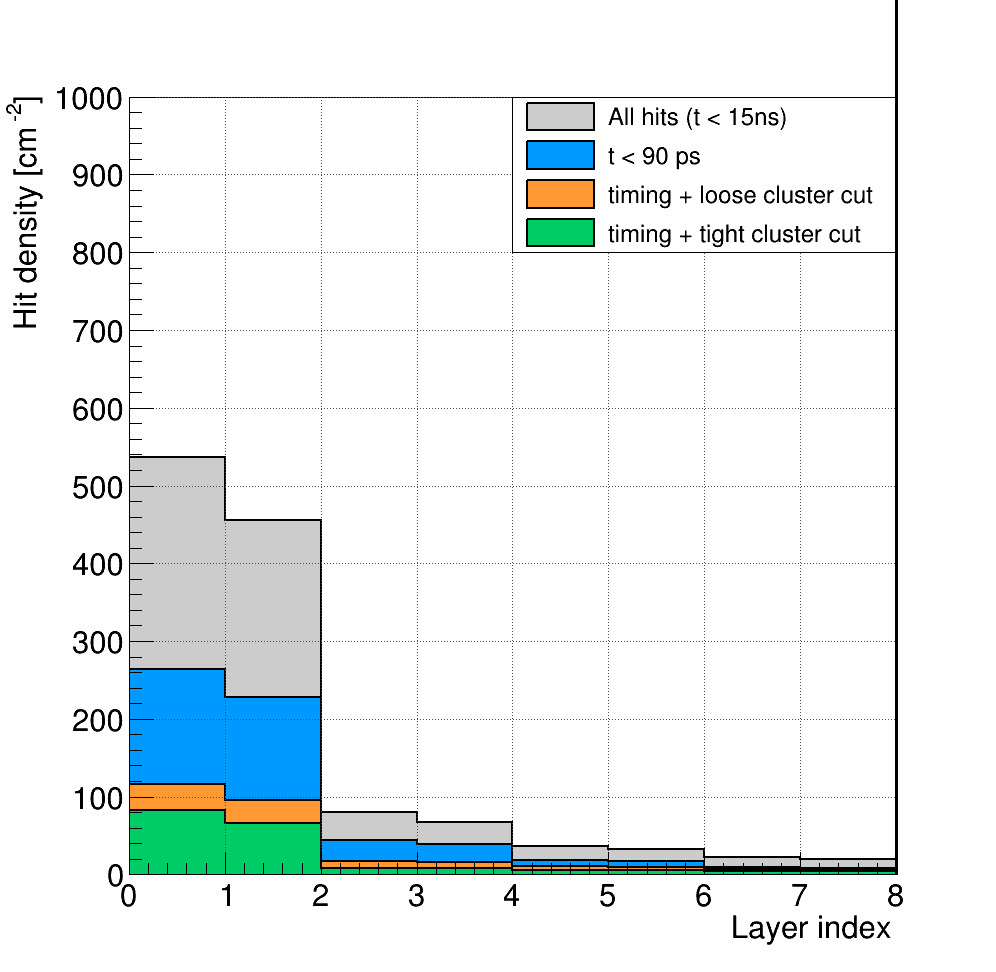

In [47]:
##########################################

# VXDBplots.py
# Imports local data from output root files and extracts contents to create a plot
# June 27, 2023
# Chris Sellgren, UCSB/LBNL/IRIS-HEP

##########################################

import ROOT as R
import math
import os
import numpy as np

R.gStyle.SetOptStat(0)
R.gStyle.SetGridColor(14)
R.gStyle.SetPadRightMargin(0.03)
R.gStyle.SetPadLeftMargin(0.12)

# hard coded values for the sensor layer areas
sens_area = {}
for sub in range(2):
    sens_area.update({('b',l*2+sub): 1e-2*130*a for l, a in enumerate([16*13,15*23,21*24,29*24])})

# set canvas
C = R.TCanvas('canvas','',1000,1000)
# R.gStyle.SetPalette(R.kBird)
C.SetLeftMargin(0.13)
C.SetRightMargin(0.1)
C.SetGrid(1,1)

# pull files from local drive
DIR_IN = '/Users/chris/Desktop/MC/data/myruns_vxdbstudy/simonebib_timingcut'
DIR_OUT = os.path.join('/Users/chris/Desktop/MC/data/plots')
NAMES = ['notimingcut','timingcut', 'loosecluster','tightcluster']
files_in = [R.TFile(os.path.join(DIR_IN,f'histograms_{n}.root')) for n in NAMES]

# extract contents from files
nH = len(NAMES)
histos = [files_in[i].MyTrackPerf_notracks.clusters.numhits_by_layer for i in range(nH)]
for h in histos:
    h.Draw()
    
    # noramlize by sensor area
    for l in range(8):
        h.SetBinContent(l+1, h.GetBinContent(l+1) / sens_area[('b', l)])
        
# make plot
names = [
    'All hits (t < 15ns)',
    't < 90 ps',
    'timing + loose cluster cut',
    'timing + tight cluster cut',
]
R.gStyle.SetGridColor(12)
C.Clear()
C.cd()
C.SetGrid(1)
C.SetLogy(False)
leg = R.TLegend(0.515, 0.74, 0.9, 0.9)
colors = [12, R.kAzure+2, R.kPink+2, R.kAzure+7, R.kTeal+2]
fills = [17,R.kAzure+7, R.kOrange+1, R.kTeal+2]
# colors = [1, 11, 15]
# fills = [0, 12, 16]
yMax = 1e4
h_ax = R.TH1F('h_ax', ';Layer index;Hit density [cm^{-2}]', 8, 0, 8)
h_ax.GetYaxis().SetMaxDigits(4)
h_ax.SetAxisRange(0, 1000, 'Y')
# Optimising the X axis
a = h_ax.GetXaxis()
#a.SetNdivisions(-208)
# Drawing the axes
h_ax.Draw('AXIS')
h_ax.Draw('AXIG same')
# Drawing
for iT, h in enumerate(histos):
    h.SetLineColor(1)
    h.SetFillColor(fills[iT])
    h.SetLineWidth(2)
    #leg_type = 'F'
    leg.AddEntry(h, names[iT], leg_type)
    h.Draw('HIST same')
h_ax.Draw('AXIG same')
leg.Draw()
C.Draw()
C.RedrawAxis()
# Drawing text labels
#t1 = R.TText(4, 3e-1, 'Barrel')

# Drawing vertical separator
l = R.TLine(8, 0, 8, yMax)
l.SetLineWidth(3)
l.SetLineColor(1)
l.Draw()
C.SaveAs(os.path.join(DIR_OUT,"simonebib_timingcut_linearscale.png"))

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /Users/chris/Desktop/MC/data/plots/10tev_new_1e_linearscale.png has been created


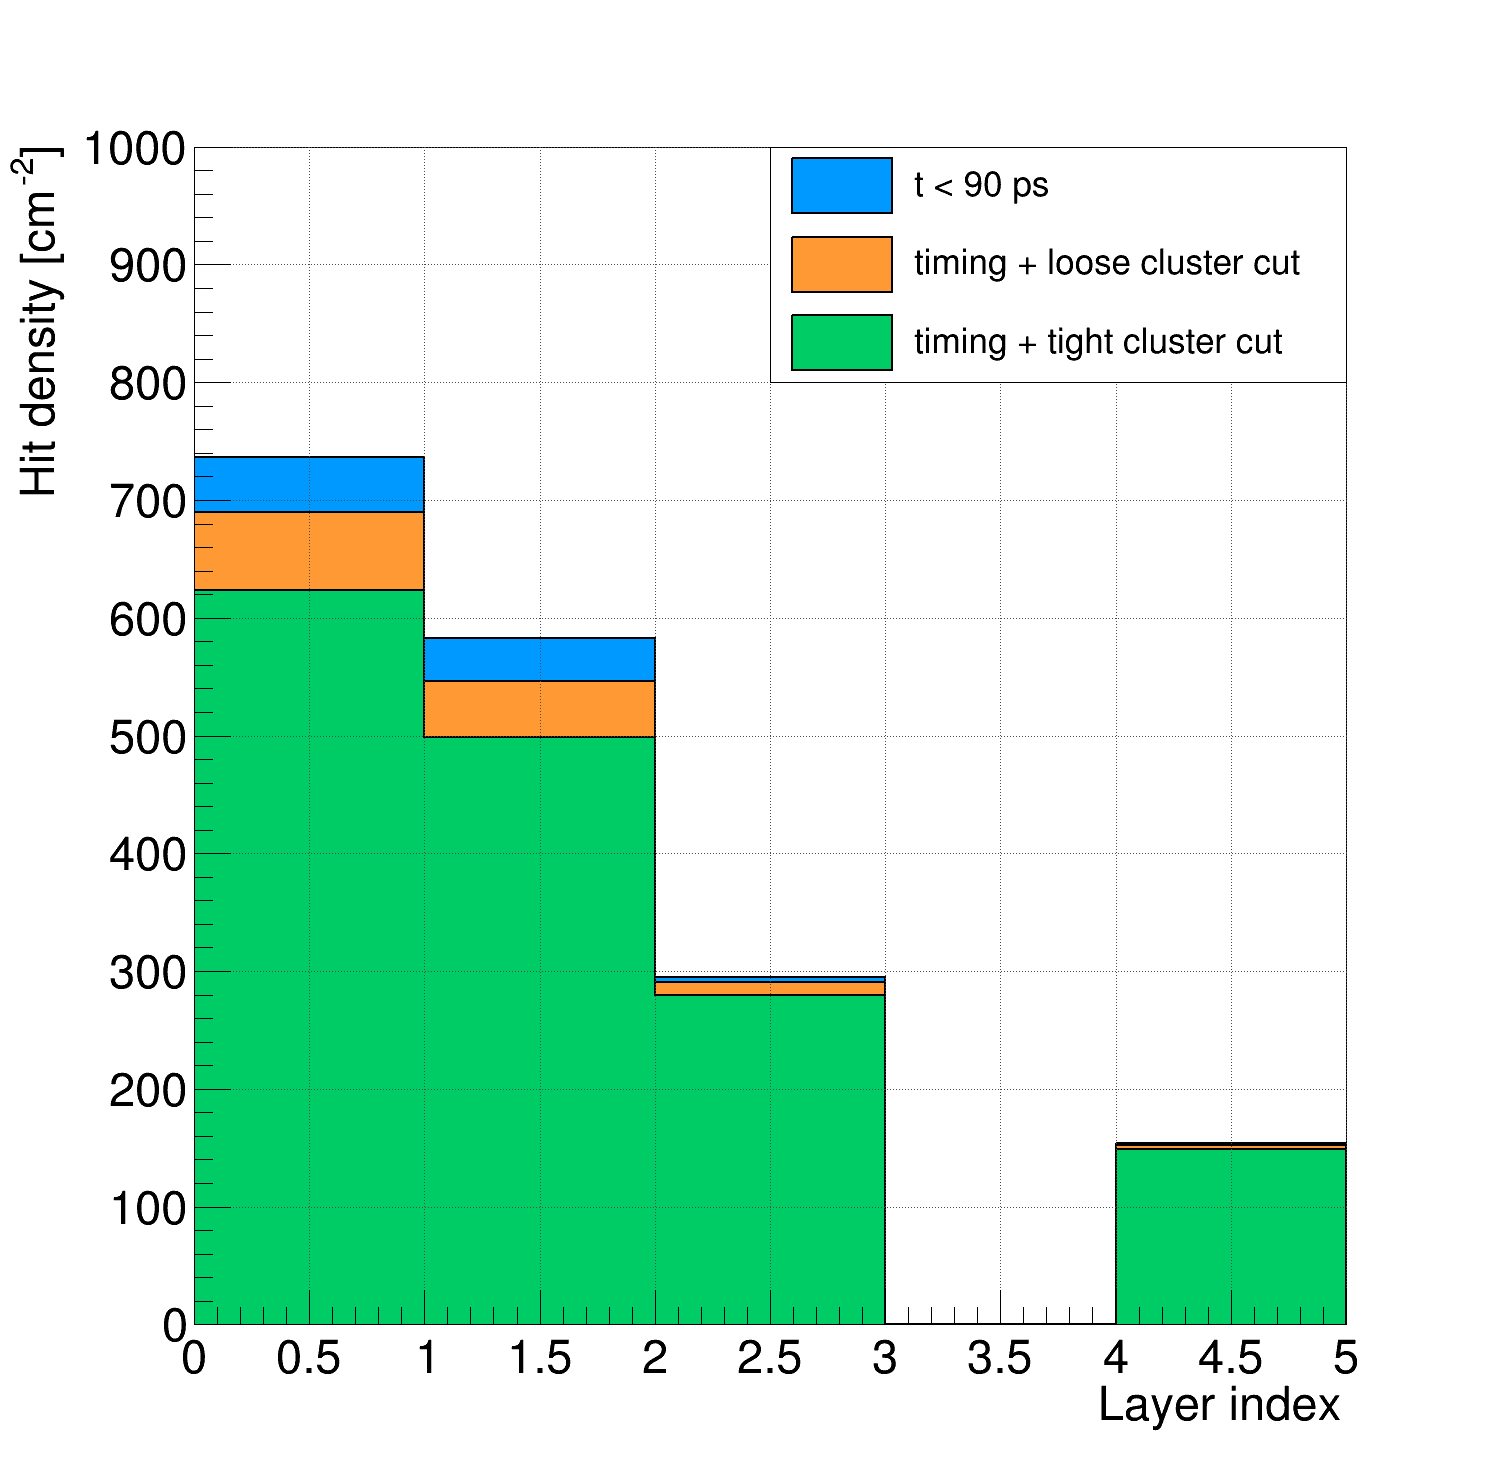

In [45]:
##########################################

# VXDBplots.py
# Imports local data from output root files and extracts contents to create a plot
# June 27, 2023
# Chris Sellgren, UCSB/LBNL/IRIS-HEP

##########################################

import ROOT as R
import math
import os
import numpy as np

R.gStyle.SetOptStat(0)
R.gStyle.SetGridColor(14)
R.gStyle.SetPadRightMargin(0.03)
R.gStyle.SetPadLeftMargin(0.12)

# hard coded values for the sensor layer areas
sens_area = {}
for sub in range(2):
    sens_area.update({('b',l*2+sub): 1e-2*130*a for l, a in enumerate([16*13,15*23,21*24,29*24])})

# set canvas
C = R.TCanvas('canvas','',1500,1500)
# R.gStyle.SetPalette(R.kBird)
C.SetLeftMargin(0.13)
C.SetRightMargin(0.1)
C.SetGrid(1,1)

# pull files from local drive
STUDY_NAME = "10tev_new"
DIR_IN = '/Users/chris/Desktop/MC/data/myruns_vxdbstudy/' + STUDY_NAME
DIR_OUT = os.path.join('/Users/chris/Desktop/MC/data/plots')
NAMES = ['timingcut', 'loosecluster','tightcluster']
files_in = [R.TFile(os.path.join(DIR_IN,f'histograms_{n}.root')) for n in NAMES]

# extract contents from files
nH = len(NAMES)
histos = [files_in[i].MyTrackPerf_notracks.clusters.numhits_by_layer for i in range(nH)]
for h in histos:
    h.Draw()
    
    # noramlize by sensor area
    for l in range(8):
        h.SetBinContent(l+1, h.GetBinContent(l+1) / sens_area[('b', l)])
        
# make plot
names = [
    't < 90 ps',
    'timing + loose cluster cut',
    'timing + tight cluster cut',
]
R.gStyle.SetGridColor(12)
C.Clear()
C.cd()
C.SetGrid(1)
C.SetLogy(False)
leg = R.TLegend(0.515, 0.74, 0.9, 0.9)
colors = [12, R.kAzure+2, R.kPink+2, R.kAzure+7, R.kTeal+2]
fills = [R.kAzure+7, R.kOrange+1, R.kTeal+2]
# colors = [1, 11, 15]
# fills = [0, 12, 16]
yMax = 1e4
h_ax = R.TH1F('h_ax', ';Layer index;Hit density [cm^{-2}]', 5, 0, 5)
h_ax.GetYaxis().SetMaxDigits(4)
h_ax.SetAxisRange(0, 1000, 'Y')
# Optimising the X axis
a = h_ax.GetXaxis()
#a.SetNdivisions(-208)
# Drawing the axes
h_ax.Draw('AXIS')
h_ax.Draw('AXIG same')
# Drawing
for iT, h in enumerate(histos):
    h.SetLineColor(1)
    h.SetFillColor(fills[iT])
    h.SetLineWidth(2)
    leg_type = 'F'
    leg.AddEntry(h, names[iT], leg_type)
    h.Draw('HIST same')
h_ax.Draw('AXIG same')
leg.Draw()
C.Draw()
C.RedrawAxis()
# Drawing text labels
#t1 = R.TText(4, 3e-1, 'Barrel')

#for t in [t1]:
#    t.SetTextAlign(22)
#    t.SetTextColor(1)
    #t.Draw()
# Drawing vertical separator
l = R.TLine(8, 0, 8, yMax)
l.SetLineWidth(3)
l.SetLineColor(1)
l.Draw()
C.SaveAs(os.path.join(DIR_OUT,STUDY_NAME+"_1e_linearscale.png"))

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


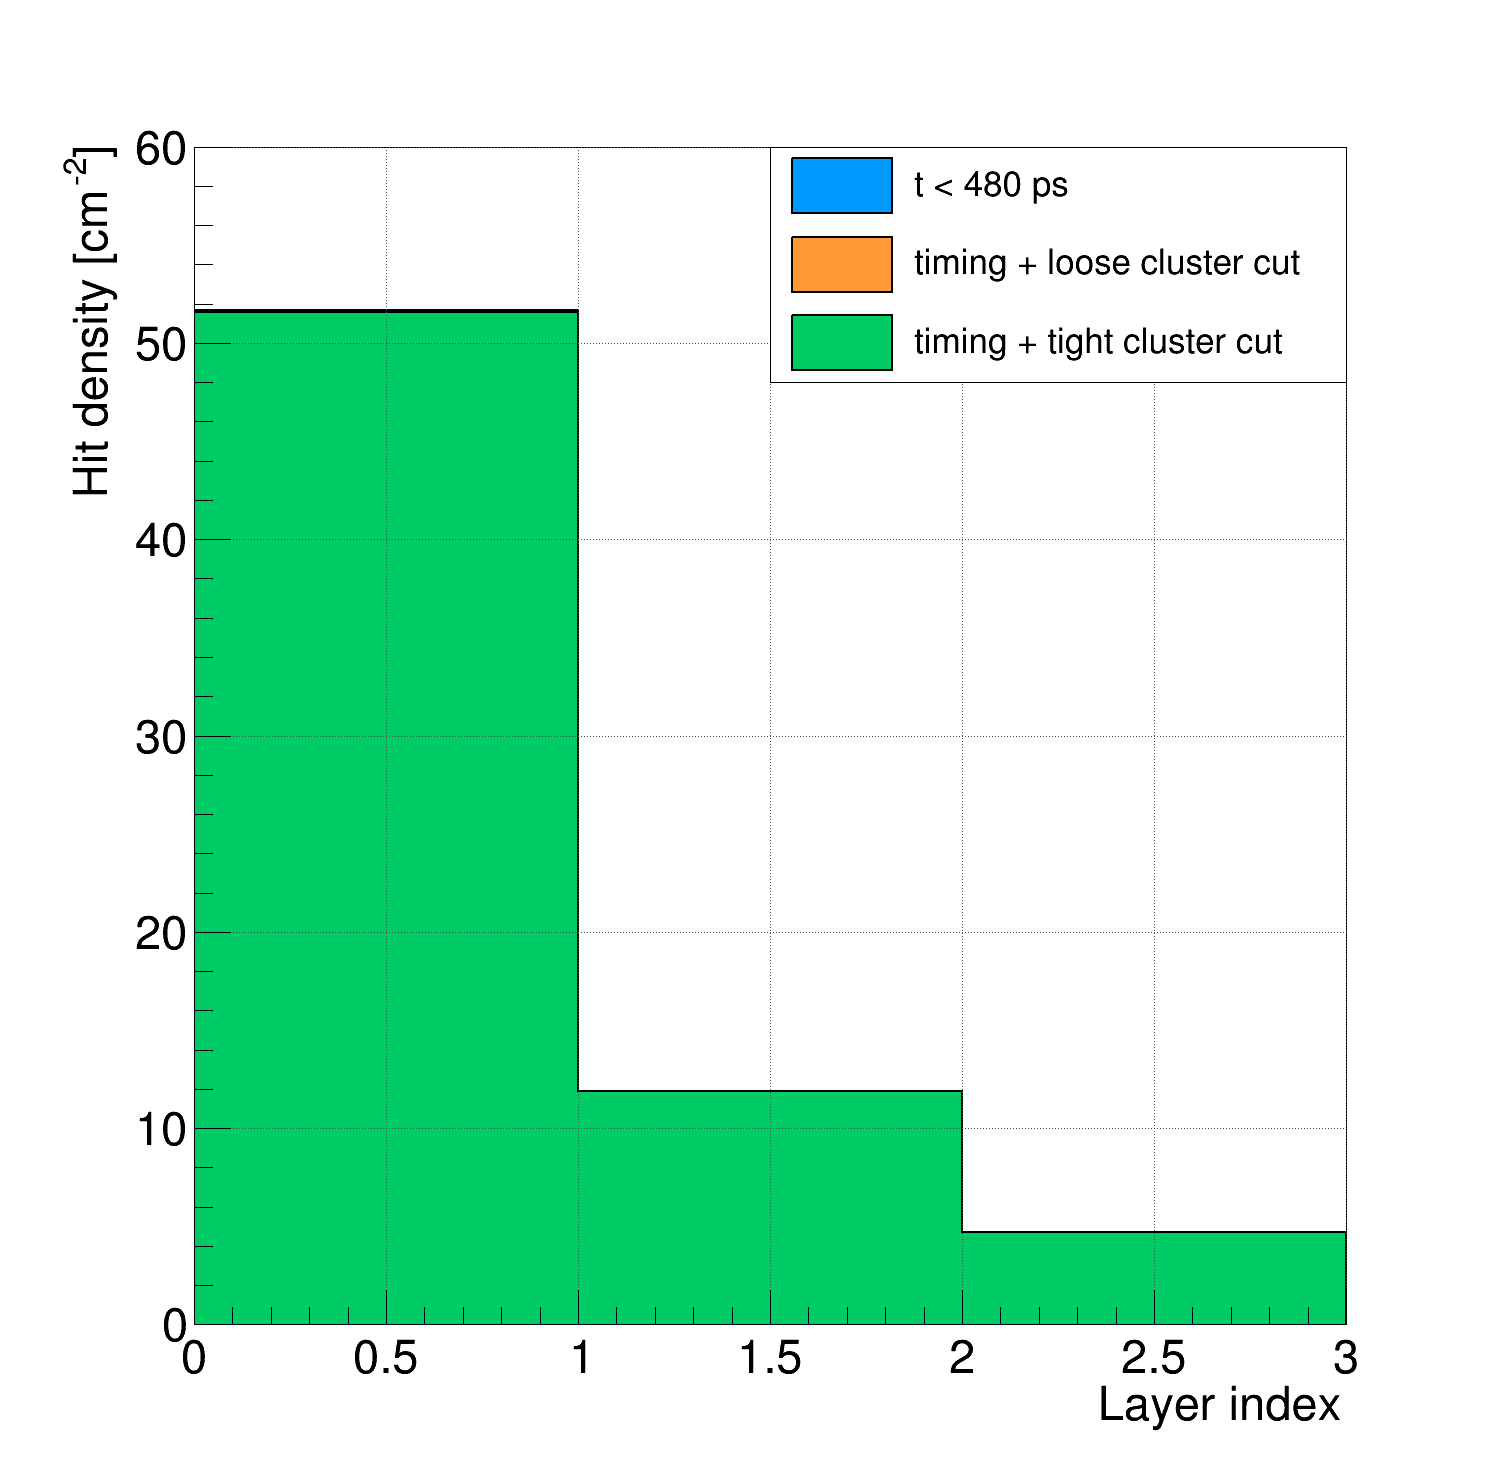

In [5]:
##########################################

# VXDBplots.py
# Imports local data from output root files and extracts contents to create a plot
# June 27, 2023
# Chris Sellgren, UCSB/LBNL/IRIS-HEP

##########################################

import ROOT as R
import math
import os
import numpy as np

R.gStyle.SetOptStat(0)
R.gStyle.SetGridColor(14)
R.gStyle.SetPadRightMargin(0.03)
R.gStyle.SetPadLeftMargin(0.12)

# hard coded values for the sensor layer areas
sens_area = {}
for sub in range(2):
    sens_area.update({('b',l*2+sub): 1e-2*130*a for l, a in enumerate([16*13,15*23,21*24,29*24])})

sens_area_ib = {}
sens_area_ib.update({('b',l): a for l, a in enumerate([8117.85,22034.16,51678.81])})
    
# set canvas
C = R.TCanvas('canvas','',1500,1500)
# R.gStyle.SetPalette(R.kBird)
C.SetLeftMargin(0.13)
C.SetRightMargin(0.1)
C.SetGrid(1,1)

# pull files from local drive
STUDY_NAME = "realinnertrackerdigi"
DIR_IN = '/Users/chris/Desktop/MC/data/myruns_vxdbstudy/' + STUDY_NAME
DIR_OUT = os.path.join('/Users/chris/Desktop/MC/data/plots')
NAMES = ['timingcut', 'loosecluster','tightcluster']
files_in = [R.TFile(os.path.join(DIR_IN,f'histograms_{n}.root')) for n in NAMES]

# extract contents from files
nH = len(NAMES)
histos_vb = [files_in[i].MyTrackPerf.clusters_vb.numhits_by_layer for i in range(nH)]
histos_ib = [files_in[i].MyTrackPerf.clusters_ib.numhits_by_layer for i in range(nH)]


for h in histos_ib:
    h.Draw()
    
    # noramlize by sensor area
    for l in range(3):
        h.SetBinContent(l+1, h.GetBinContent(l+1) / sens_area_ib[('b', l)])
        
# make plot
names = [
    't < 480 ps',
    'timing + loose cluster cut',
    'timing + tight cluster cut',
]

R.gStyle.SetGridColor(12)
C.Clear()
C.cd()
C.SetGrid(1)
C.SetLogy(False)
leg = R.TLegend(0.515, 0.74, 0.9, 0.9)
colors = [12, R.kAzure+2, R.kPink+2, R.kAzure+7, R.kTeal+2]
fills = [R.kAzure+7, R.kOrange+1, R.kTeal+2]
# colors = [1, 11, 15]
# fills = [0, 12, 16]
yMax = 1e4
h_ax = R.TH1F('h_ax', ';Layer index;Hit density [cm^{-2}]', 3, 0, 3)
#h_ax.GetYaxis().SetMaxDigits(4)
h_ax.SetAxisRange(0, 60, 'Y')
# Optimising the X axis
a = h_ax.GetXaxis()
#a.SetNdivisions(-208)
# Drawing the axes
h_ax.Draw('AXIS')
h_ax.Draw('AXIG same')
# Drawing
for iT, h in enumerate(histos_ib):
    h.SetLineColor(1)
    h.SetFillColor(fills[iT])
    h.SetLineWidth(2)
    leg_type = 'F'
    leg.AddEntry(h, names[iT], leg_type)
    h.Draw('HIST same')
h_ax.Draw('AXIG same')
leg.Draw()
C.Draw()
C.RedrawAxis()
# Drawing text labels
#t1 = R.TText(4, 3e-1, 'Barrel')

#for t in [t1]:
#    t.SetTextAlign(22)
#    t.SetTextColor(1)
    #t.Draw()
# Drawing vertical separator
l = R.TLine(8, 0, 8, yMax)
l.SetLineWidth(3)
l.SetLineColor(1)
l.Draw()
#C.SaveAs(os.path.join(DIR_OUT,STUDY_NAME+"_1e.png"))